Click [here]() to access the associated Medium article.

# Setup

In [1]:
!pip install -q numpy pandas matplotlib

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Plot style
plt.style.use("plot_style/ggplot_classic.mplstyle")

# Seed for reproducibility
SEED = 7

# Inappropriate Use of Piecharts

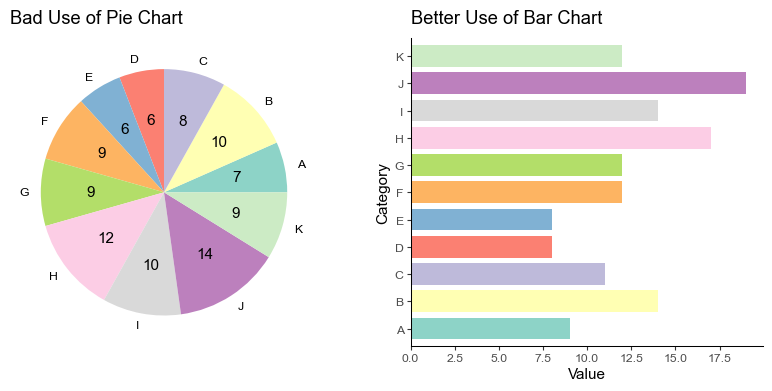

In [154]:
# Data
np.random.seed(SEED)  # set random seed for reproducibility
n_cat = 11  # number of categories
df = pd.DataFrame(
    {
        "Category": list(string.ascii_uppercase[:n_cat]),
        "Value": np.random.randint(5, 20, n_cat),
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.pie(
    y="Value",
    labels=df["Category"],
    autopct="%.0f",
    colors=plt.cm.Set3.colors,
    title="Bad Use of Pie Chart",
    ylabel="",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot.barh(
    x="Category",
    y="Value",
    width=0.8,
    color=plt.cm.Set3.colors,
    title="Better Use of Bar Chart",
    xlabel="Value",
    legend=False,
    ax=ax[1],
)

# Save plot
plt.savefig("image/pie.png", bbox_inches="tight", dpi=200)

plt.show()

# Misleading y-axis

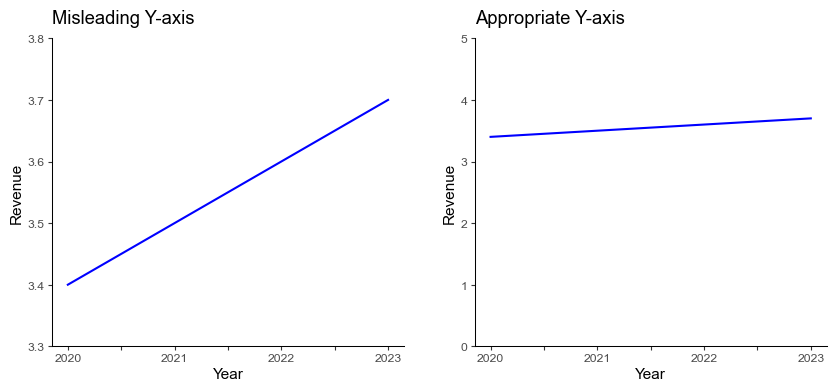

In [12]:
# Data
df = pd.DataFrame(
    {
        "Year": ["2020", "2021", "2022", "2023"],
        "Revenue": [3.4, 3.5, 3.6, 3.7],
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    x="Year",
    y="Revenue",
    color="blue",
    ylim=(3.3, 3.8),
    title="Misleading Y-axis",
    ylabel="Revenue",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot(
    x="Year",
    y="Revenue",
    color="blue",
    ylim=(0, 5),
    title="Appropriate Y-axis",
    ylabel="Revenue",
    legend=False,
    ax=ax[1],
)

# Save plot
plt.savefig("image/y_ax.png", bbox_inches="tight", dpi=200)

plt.show()

# Overcomplication of Plot Designs

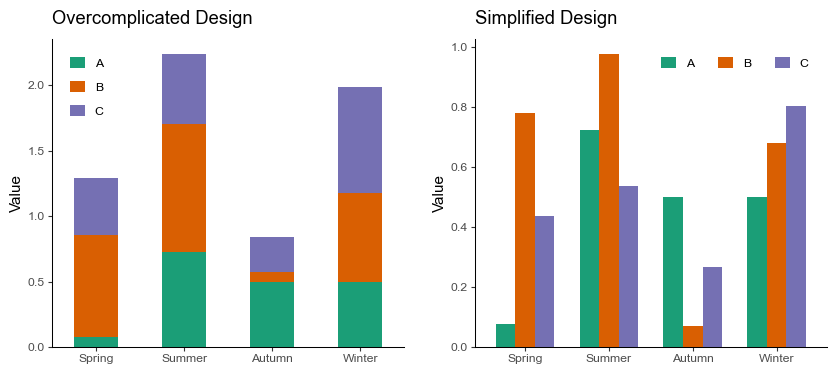

In [14]:
# Data
np.random.seed(SEED)
n_columns = 3
df = pd.DataFrame(
    np.random.rand(4, n_columns),
    columns=list(string.ascii_uppercase[:n_columns]),
    index=["Spring", "Summer", "Autumn", "Winter"],
)

# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.bar(
    stacked=True,
    rot=0,
    color=plt.cm.Dark2.colors,
    title="Overcomplicated Design",
    ylabel="Value",
    ax=axs[0],
)

# Good Example
df.plot.bar(
    width=0.7,
    rot=0,
    color=plt.cm.Dark2.colors,
    title="Simplified Design",
    ylabel="Value",
    ax=axs[1],
).legend(loc="upper right", ncol=3)

# Save plot
plt.savefig("image/stacked.png", bbox_inches="tight", dpi=200)

plt.show()

# Ignoring Scale Differences

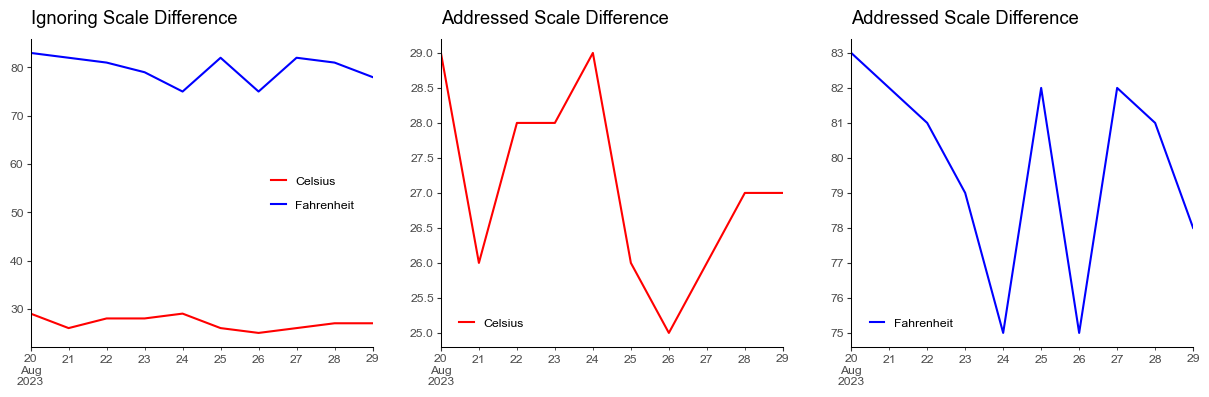

In [366]:
# Data
np.random.seed(SEED)
n_points = 10
df = pd.DataFrame(
    {
        "Celsius": np.random.randint(25, 31, n_points),
        "Fahrenheit": np.random.randint(75, 85, n_points)
    },
    index=pd.date_range(start="2023-08-20", periods=n_points, freq="D"),
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Bad Example
df.plot(title="Ignoring Scale Difference", color=["red", "blue"], ax=ax[0])

# Good Example
df["Celsius"].plot(
    title="Addressed Scale Difference",
    color="red",
    ax=ax[1],
).legend(loc="lower left")

df["Fahrenheit"].plot(
    title="Addressed Scale Difference",
    color="blue",
    ax=ax[2],
).legend(loc="lower left")

# Save plot
plt.savefig("image/scale.png", bbox_inches="tight", dpi=200)

plt.show()

# Unconsidered use of 3D Plots

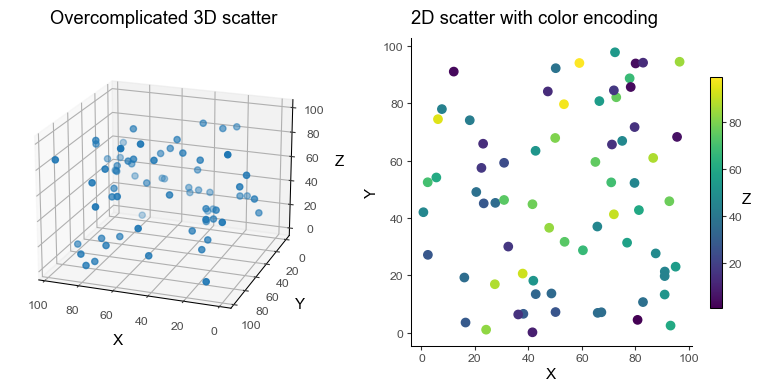

In [142]:
# Data
np.random.seed(SEED)
df = pd.DataFrame(np.random.rand(70, 3) * 100, columns=["X", "Y", "Z"])

# Plot
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(121, projection="3d")
ax1 = fig.add_subplot(122)

# Bad Example
ax0.scatter(df["X"], df["Y"], df["Z"])
ax0.view_init(elev=20, azim=110, roll=0)
ax0.set(
    title="Overcomplicated 3D scatter",
    xlabel="X",
    ylabel="Y",
    zlabel="Z",
)

# Good Example
scatter = ax1.scatter(df["X"], df["Y"], c=df["Z"])
ax1.set(title="2D scatter with color encoding", xlabel="X", ylabel="Y")
fig.colorbar(scatter, shrink=0.75, label="Z").set_label("Z", rotation=0)

# Save plot
plt.savefig("image/3d.png", bbox_inches="tight", dpi=200)

plt.show()

# Overplotting

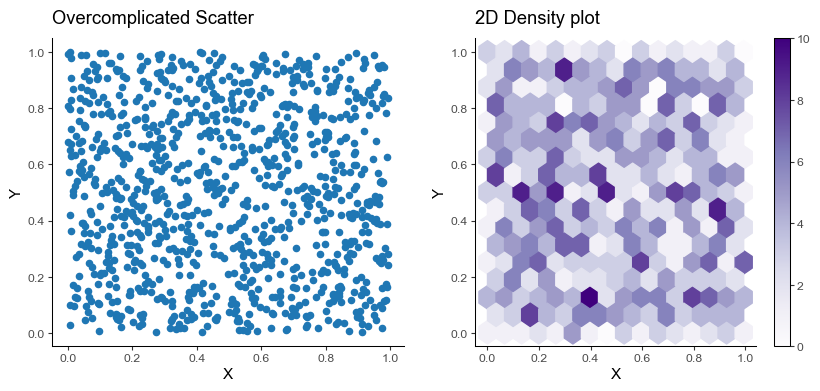

In [186]:
# Data
np.random.seed(SEED)
df = pd.DataFrame(np.random.rand(1000, 2), columns=["X", "Y"])

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.scatter(x="X", y="Y", title="Overcomplicated Scatter", ax=ax[0])

# Good Example
num_hexagons = 15  # no. hexagons in x-axis. The more, the finer the grid.
df.plot.hexbin(
    x="X",
    y="Y",
    gridsize=num_hexagons,
    cmap="Purples",
    title="2D Density plot",
    ax=ax[1],
)

# Save plot
plt.savefig("image/overplotting.png", bbox_inches="tight", dpi=200)

plt.show()

# Not Emphasizing on What's Important

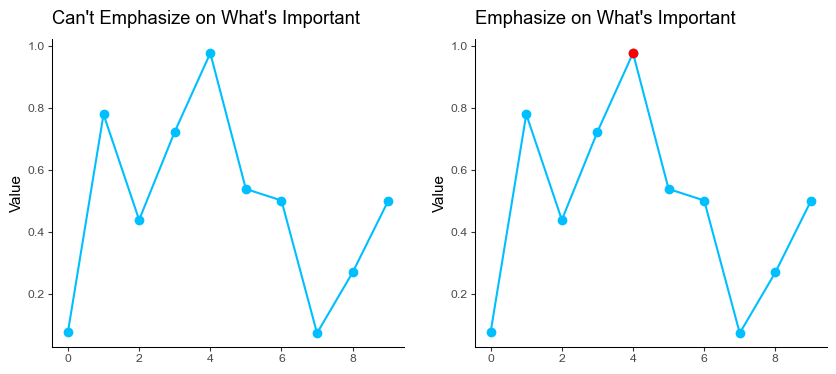

In [349]:
# Data
np.random.seed(SEED)
df = pd.DataFrame(np.random.rand(10, 1), columns=["Value"])

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    title="Can't Emphasize on What's Important",
    ylabel="Value",
    marker="o",
    color="deepskyblue",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot(
    title="Emphasize on What's Important",
    ylabel="Value",
    marker="o",
    color="deepskyblue",
    legend=False,
    ax=ax[1],
)

important_idx = np.argmax(df["Value"])  # index of the important point
ax[1].plot(important_idx, df.iloc[important_idx], color="red", marker="o")

# Save plot
plt.savefig('image/emphasize.png', bbox_inches='tight', dpi=200)

plt.show()

# Improper use of Line charts for Discrete Data

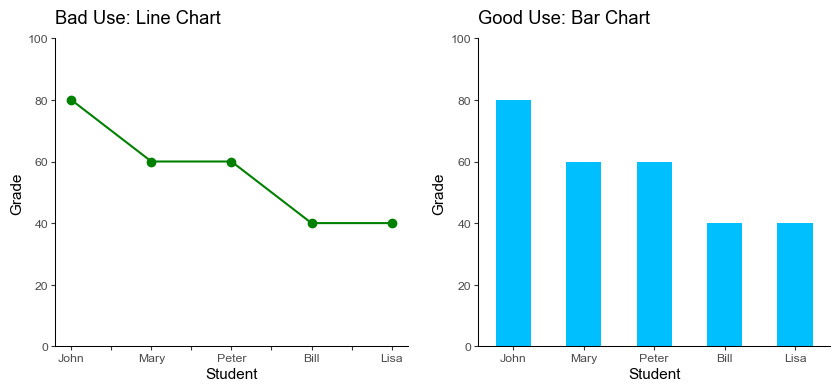

In [347]:
# Data
df = pd.DataFrame(
    {
        "student": ["John", "Mary", "Peter", "Bill", "Lisa"],
        "grade": [80, 60, 60, 40, 40],
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot(
    x="student",
    y="grade",
    ylim=(0, 100),
    marker="o",
    title="Bad Use: Line Chart",
    xlabel="Student",
    ylabel="Grade",
    color="green",
    legend=False,
    ax=ax[0],
)

# Good Example
df.plot.bar(
    x="student",
    y="grade",
    ylim=(0, 100),
    title="Good Use: Bar Chart",
    xlabel="Student",
    ylabel="Grade",
    color="deepskyblue",
    rot=0,
    legend=False,
    ax=ax[1],
)

# Save plot
plt.savefig('image/line.png', bbox_inches='tight', dpi=200)

plt.show()

# 

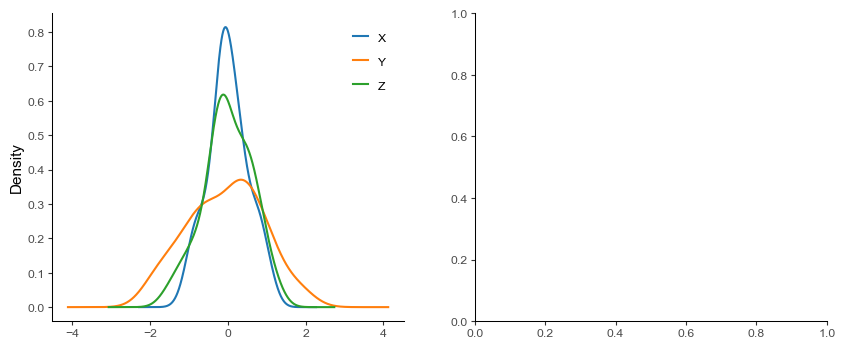

In [415]:
# Bad Example
# generate a dataset for 3 kde plots
np.random.seed(SEED)
n_points = 100
df = pd.DataFrame(
    # np.random.normal(0, 1, n_points),
    # columns=["X", "Y", "Z"],
    {
        "X": np.random.normal(0, 0.5, n_points),
        "Y": np.random.normal(0, 1, n_points),
        "Z": np.random.normal(0, 0.7, n_points),
    }
)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Bad Example
df.plot.density(
#     title="Bad Use: 2D KDE Plot",
#     xlabel="X",
#     ylabel="Y",
#     cmap="Blues",
    ax=ax[0],
)

# # Good Example
# df.plot.kde(
#     title="Good Use: 1D KDE Plot",
#     xlabel="X",
#     ylabel="Density",
#     cmap="Blues",
#     ax=ax[1],
# )

# plt.figure(figsize=(10, 4))
# plt.plot(df)
# plt.title("Bad: Single plot for multidimensional data")
# plt.legend(df.columns)
# plt.show()

# Good Example
# for ax, col in zip(axs, df.columns):
#     ax.kdeplot(df[col])
#     ax.set_title(col)
plt.show()